In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score


In [2]:
train = pd.read_csv('criminal_train.csv')
test = pd.read_csv('criminal_test.csv')

In [3]:
#column names of testing data set 
print("-----TEST DATA-----")
test.head()

-----TEST DATA-----


,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [4]:
#checking the shape of Train and Test dataset
print("Shape of Train dataset is:", train.shape)
print("Shape of Test dataset is: ", test.shape)

Shape of Train dataset is: (45718, 72)
Shape of Test dataset is:  (11430, 71)


In [5]:
for i in train.columns:
    print(i, train[i].unique())

PERID [25095143 13005143 67415143 ... 52173679 29283679 87483679]
IFATHER [ 4  1  2  3 -1]
NRCH17_2 [ 2  1  0  3 -1]
IRHHSIZ2 [ 4  3  2  6  1  5 -1]
IIHHSIZ2 [ 1  3 -1]
IRKI17_2 [ 3  2  1  4 -1]
IIKI17_2 [ 1  3 -1]
IRHH65_2 [ 1  2  3 -1]
IIHH65_2 [ 1  3  2 -1]
PRXRETRY [99  2 98 94 97 -1]
PRXYDATA [99  1 98 94  2 97 -1]
MEDICARE [ 2  1 94 97 98 85 -1]
CAIDCHIP [ 1  2 85 97 94 98 -1]
CHAMPUS [ 2  1 94 97 98 85 -1]
PRVHLTIN [ 2  1 94 97 98 85 -1]
GRPHLTIN [99  1  2 98 97 94 85 -1]
HLTINNOS [99  2  1 94 97 98 -1]
HLCNOTYR [ 2 99  1 98 97 85 94 -1]
HLCNOTMO [99  2  3  1  6  8  4 98  5 97 12 11  9 10 85  7 94 -1]
HLCLAST [99  1  5  2  4  3 98 97 94 -1]
HLLOSRSN [99  1  2 12  4  5 11 98  3  9 97  6 10  7  8 94 85 -1]
HLNVCOST [99  1 98  6 97 94 -1]
HLNVOFFR [99  6 98 97  1 94 -1]
HLNVREF [99  6 98 97  1 94 -1]
HLNVNEED [99  6 98  1 97 94 -1]
HLNVSOR [99  6 98 97  1 94 -1]
IRMCDCHP [ 1  2 -1]
IIMCDCHP [ 1  3 -1]
IRMEDICR [ 2  1 -1]
IIMEDICR [ 1  3 -1]
IRCHMPUS [ 2  1 -1]
IICHMPUS [ 1  3 -1]
I

#### Here, the null values are represneted by -1. Further we try to get the length of -1 containing rows and the drop the respective rows



In [6]:
for i in train.columns:
    print(i, len(train[train[i] == -1]))

PERID 0
IFATHER 2
NRCH17_2 84
IRHHSIZ2 2
IIHHSIZ2 2
IRKI17_2 2
IIKI17_2 2
IRHH65_2 2
IIHH65_2 2
PRXRETRY 2
PRXYDATA 2
MEDICARE 2
CAIDCHIP 2
CHAMPUS 2
PRVHLTIN 2
GRPHLTIN 2
HLTINNOS 2
HLCNOTYR 2
HLCNOTMO 2
HLCLAST 2
HLLOSRSN 2
HLNVCOST 2
HLNVOFFR 2
HLNVREF 2
HLNVNEED 2
HLNVSOR 2
IRMCDCHP 2
IIMCDCHP 2
IRMEDICR 2
IIMEDICR 2
IRCHMPUS 2
IICHMPUS 2
IRPRVHLT 2
IIPRVHLT 2
IROTHHLT 2
IIOTHHLT 2
HLCALLFG 2
HLCALL99 2
ANYHLTI2 2
IRINSUR4 2
IIINSUR4 2
OTHINS 2
CELLNOTCL 2
CELLWRKNG 2
IRFAMSOC 2
IIFAMSOC 2
IRFAMSSI 2
IIFAMSSI 2
IRFSTAMP 2
IIFSTAMP 2
IRFAMPMT 2
IIFAMPMT 2
IRFAMSVC 2
IIFAMSVC 2
IRWELMOS 2
IIWELMOS 2
IRPINC3 2
IRFAMIN3 2
IIPINC3 2
IIFAMIN3 2
GOVTPROG 2
POVERTY3 343
TOOLONG 2
TROUBUND 2
PDEN10 2
COUTYP2 2
MAIIN102 2
AIIND102 2
ANALWT_C 2
VESTR 2
VEREP 2
Criminal 0


In [7]:
for i in test.columns:
    print(i, len(test[test[i] == -1]))

PERID 0
IFATHER 0
NRCH17_2 8
IRHHSIZ2 0
IIHHSIZ2 0
IRKI17_2 0
IIKI17_2 0
IRHH65_2 0
IIHH65_2 0
PRXRETRY 0
PRXYDATA 0
MEDICARE 0
CAIDCHIP 0
CHAMPUS 0
PRVHLTIN 0
GRPHLTIN 0
HLTINNOS 0
HLCNOTYR 0
HLCNOTMO 0
HLCLAST 0
HLLOSRSN 0
HLNVCOST 0
HLNVOFFR 0
HLNVREF 0
HLNVNEED 0
HLNVSOR 0
IRMCDCHP 0
IIMCDCHP 0
IRMEDICR 0
IIMEDICR 0
IRCHMPUS 0
IICHMPUS 0
IRPRVHLT 0
IIPRVHLT 0
IROTHHLT 0
IIOTHHLT 0
HLCALLFG 0
HLCALL99 0
ANYHLTI2 0
IRINSUR4 0
IIINSUR4 0
OTHINS 0
CELLNOTCL 0
CELLWRKNG 0
IRFAMSOC 0
IIFAMSOC 0
IRFAMSSI 0
IIFAMSSI 0
IRFSTAMP 0
IIFSTAMP 0
IRFAMPMT 0
IIFAMPMT 0
IRFAMSVC 0
IIFAMSVC 0
IRWELMOS 0
IIWELMOS 0
IRPINC3 0
IRFAMIN3 0
IIPINC3 0
IIFAMIN3 0
GOVTPROG 0
POVERTY3 76
TOOLONG 0
TROUBUND 0
PDEN10 0
COUTYP2 0
MAIIN102 0
AIIND102 0
ANALWT_C 0
VESTR 0
VEREP 0


In [8]:
pd.crosstab(train.POVERTY3, train.Criminal)

Criminal,0,1
POVERTY3,,
-1,237,106
1,8489,842
2,8767,1458
3,25050,769


#### Here, we shall replace -1 with the value that occur the highest number of times in the training and testing dataset. We shall also drop the Column named "PERID" as the variable has no contribution/effect anyhow on the output variable.

In [9]:
train['POVERTY3'].replace(-1,3, inplace = True)
test['POVERTY3'].replace(-1,3, inplace = True)

In [10]:
train['NRCH17_2'].replace(-1, 0, inplace = True)
test['NRCH17_2'].replace(-1, 0, inplace = True)

In [11]:
train_period = train['PERID']
test_period = test['PERID']

In [12]:
train_criminal = train['Criminal']

train1 = train.drop(['PERID', 'Criminal'], axis = 1)
test1 = test.drop(['PERID'], axis  = 1)

#### Now, We split the training dataset into train and test dataset in 7:3 ratio respectivelty so the different can be trained and verified on the specified daaset.

In [13]:
for i in train.columns:
    train.drop(train[train[i] == -1].index, inplace = True)

In [14]:
x, y = train1, train_criminal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [15]:
def PlotConfusionMatrix(y_test,y_pred,):

    cfn_matrix = confusion_matrix(y_test,y_pred)
    
    plt.rcParams['figure.figsize'] = (3.5, 3.5)
    sns.set(style = 'dark', font_scale = 2)
    sns.heatmap(cfn_matrix, annot = True, annot_kws = {"size": 15})
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,y_pred))
    print('---F1 Score---')
    print(f1_score(y_test,y_pred))


#### 1. LOGISTIC REGRESSION

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


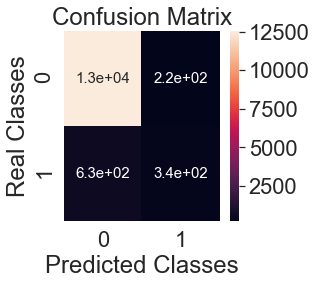

---Classification Report---
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12748
           1       0.61      0.35      0.45       968

    accuracy                           0.94     13716
   macro avg       0.78      0.67      0.71     13716
weighted avg       0.93      0.94      0.93     13716

---F1 Score---
0.4482306684141546


In [16]:
logmodel = LogisticRegression(penalty = 'l1', max_iter = 1000)
logmodel.fit(x_train, y_train)
prediction_LOGISTIC = logmodel.predict(x_test)

# Score of the model
PlotConfusionMatrix(y_test, prediction_LOGISTIC)

f1_score_log = f1_score(y_test, prediction_LOGISTIC)

#### 2. DECISION TREE

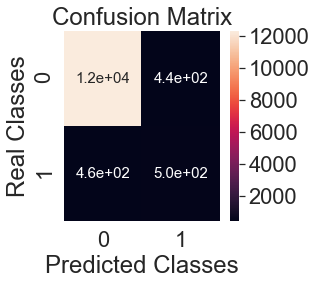

---Classification Report---
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     12748
           1       0.53      0.52      0.53       968

    accuracy                           0.93     13716
   macro avg       0.75      0.74      0.75     13716
weighted avg       0.93      0.93      0.93     13716

---F1 Score---
0.5274151436031331


In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
prediction_dtree = dtree.predict(x_test)

# Score of the model
PlotConfusionMatrix(y_test, prediction_dtree)

f1_score_dtree = f1_score(y_test, prediction_dtree)

#### 3. XGBoost

In [18]:

model = XGBClassifier()
model.fit(x_train, y_train)

prediction_xgboost = model.predict(x_test)

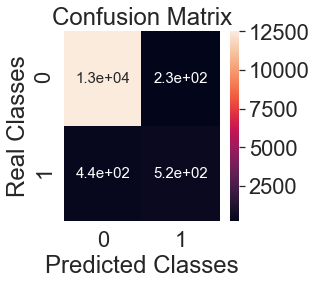

---Classification Report---
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     12748
           1       0.70      0.54      0.61       968

    accuracy                           0.95     13716
   macro avg       0.83      0.76      0.79     13716
weighted avg       0.95      0.95      0.95     13716

---F1 Score---
0.610110400929692


In [19]:
# Score of the model
PlotConfusionMatrix(y_test, prediction_xgboost)

f1_score_xgboost = f1_score(y_test, prediction_xgboost)

In all the three cases, Logistic Regression, Decision Tree and XGBoost we notice a very low f1 score. WE observe such trends because of the data being imbalanced. In order to address such probems we can over populate the minority class, under populate the majority class or use K flod methods. Henceforth, we have used the over sampling method. We have chossen SMOTE to over populate the non-criminal class randomly and run the same algorithms. Although  any tree based algorithm is indifferent towards the nature of the dataset but we shall try to observe if there is any change in the f1 score when we used SMOTE + Decision tree.

In [20]:
train.groupby('Criminal')['Criminal'].count()

Criminal
0    42541
1     3175
Name: Criminal, dtype: int64

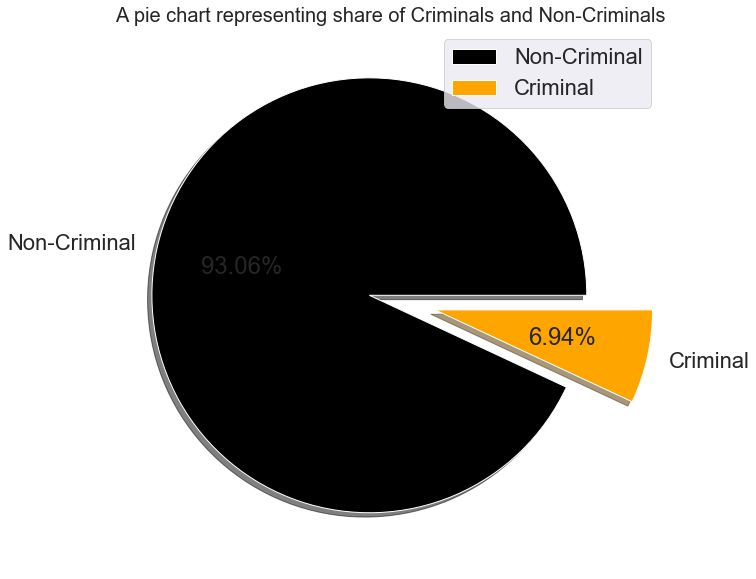

In [21]:
labels = ['Non-Criminal', 'Criminal']
colors = ['black', 'orange']
size = [42543, 3175]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.axis('off')
plt.title('A pie chart representing share of Criminals and Non-Criminals',fontsize = 20)
plt.legend()
plt.show()

#### 4. SMOTE- Synthetic Minority Oversampling Technique

In [22]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x, y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (85086, 70)
Shape of y: (85086,)


In [23]:
# splitting the dataset into train and tests

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.3
                                                    , random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (59560, 70)
Shape of x_test:  (25526, 70)
Shape of y_train:  (59560,)
Shape of y_test:  (25526,)


#### 5. XGBOOST

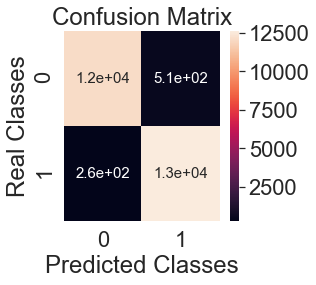

---Classification Report---
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12637
           1       0.96      0.98      0.97     12889

    accuracy                           0.97     25526
   macro avg       0.97      0.97      0.97     25526
weighted avg       0.97      0.97      0.97     25526

---F1 Score---
0.9703305149884704


In [24]:

model1 = XGBClassifier()
model1.fit(x_train, y_train)

prediction_xgboost_smote = model1.predict(x_test)

PlotConfusionMatrix(y_test, prediction_xgboost_smote)

f1_score_xgboost_smote = f1_score(y_test, prediction_xgboost_smote)

#### 6. Decision Tree + SMOTE

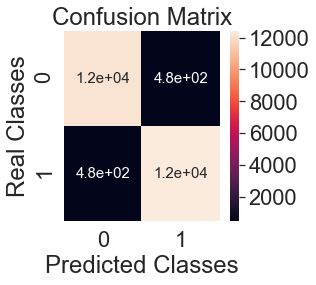

---Classification Report---
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12637
           1       0.96      0.96      0.96     12889

    accuracy                           0.96     25526
   macro avg       0.96      0.96      0.96     25526
weighted avg       0.96      0.96      0.96     25526

---F1 Score---
0.9629112352576039


In [25]:
dtree_smote = DecisionTreeClassifier()
dtree_smote.fit(x_train, y_train)
prediction_dtree_smote = dtree_smote.predict(x_test)

PlotConfusionMatrix(y_test, prediction_dtree_smote)

f1_score_dtree_smote = f1_score(y_test, prediction_dtree_smote)

### -------- RESULTS ----------

In [26]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree' , 'XGBoost', 'XGBoost + SMOTE', 'Decision Tree + SMOTE'],
    'F1 Score': [f1_score_log, f1_score_dtree, f1_score_xgboost, f1_score_xgboost_smote , f1_score_dtree_smote ]})
models.sort_values(by='F1 Score',ascending=False)

,Model,F1 Score
3,XGBoost + SMOTE,0.970331
4,Decision Tree + SMOTE,0.962911
2,XGBoost,0.610110
1,Decision Tree,0.527415
0,Logistic Regression,0.448231


In [27]:
accuracy_xgboost_smote = accuracy_score(y_test, prediction_xgboost_smote)
print(accuracy_xgboost_smote)

0.9697563268823944


### We notice that after over sampling the minorty class and applying XGBoost Algorithm we obtain the best results. We have attained an accuracy of 96.94% for predicting the chances of a person commiting crime.

      ****************************************************************************************